# Columns of Interest
1. Location
2. Description
3. Has questions
4. Employment Type

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import spacy


In [4]:
import nltk
from nltk.util import ngrams
from nltk.tokenize import word_tokenize
from collections import Counter
from wordcloud import WordCloud
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English

## Data Loading

In [5]:
data = pd.read_excel("../Data/gerald_data_cleaned.xlsx")
data.head()

,Unnamed: 0,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,0,1,Marketing Intern,"US, NY, New York",marketing,NaN,we are food52 and we have created a groundbrea...,food52 a fast growing james beard award winnin...,experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",success,NaN,90 seconds the worlds cloud video production s...,organised focused vibrant awesome do you have ...,what we expect from you your key responsibilit...,what you will get from usthrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,valor services provides workforce solutions th...,our client located in houston is actively seek...,implement pre commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,3,4,Account Executive - Washington DC,"US, DC, Washington",sales,NaN,our passion for improving quality of life thro...,the company esri environmental systems researc...,education bachelor s or master s in gis busine...,our culture is anything but corporate we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,spotsource solutions llc is a global human cap...,job title itemization review managerlocation f...,qualifications right now license in the state ...,full benefits offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [12]:
train = pd.read_csv('../Data/train_data.csv')
test = pd.read_csv('../Data/test_data.csv')

## Location Column
Split into 'Country', 'State', 'City'

In [12]:
country_state_city = list(data['location'].str.split(', ').values)
print(country_state_city)


[['US', 'NY', 'New York'], ['NZ', '', 'Auckland'], ['US', 'IA', 'Wever'], ['US', 'DC', 'Washington'], ['US', 'FL', 'Fort Worth'], ['US', 'MD', ''], ['DE', 'BE', 'Berlin'], ['US', 'CA', 'San Francisco'], ['US', 'FL', 'Pensacola'], ['US', 'AZ', 'Phoenix'], ['US', 'NJ', 'Jersey City'], ['GB', 'LND', 'London'], ['US', 'CT', 'Stamford'], ['US', 'FL', 'Orlando'], ['AU', 'NSW', 'Sydney'], ['SG', '01', 'Singapore'], ['IL', '', 'Tel Aviv', 'Israel'], ['GB', 'SOS', 'Southend-on-Sea'], ['US', 'NY', 'New York'], ['US', 'PA', 'USA Northeast'], ['US', 'TX', 'Austin'], ['NZ', 'N', 'Auckland'], ['AE', '', ''], ['US', 'CA', 'Carlsbad'], ['GB', 'LND', 'London'], ['US', 'NY', 'New York '], ['SG', '', ''], ['AE', 'AZ', 'Abudhabi'], ['US', 'MO', 'St. Louis'], ['CA', 'ON', 'Toronto'], ['US', 'MA', 'Waltham'], ['US', 'KS', ''], ['US', 'WA', 'Everett'], ['US', 'CA', 'San Ramon'], ['GB', 'LND', ''], ['US', 'NY', 'Saint Bonaventure'], ['US', 'NY', 'Yonkers'], ['US', 'TX', 'HOUSTON'], ['IN', 'AP', 'Hyderabad'], 

Many entries with missing state or city.

In [13]:
for row_idx, row in enumerate(country_state_city):
    if row is np.nan:
        country_state_city[row_idx] = ['Undefined'] * 3
    else:
        for idx, item in enumerate(row):
            if item == '':
                row[idx] = 'Undefined'

print(country_state_city[:11])

for idx, row in enumerate(country_state_city):
    if len(row) > 3:
        print(idx, row)

[['US', 'NY', 'New York'], ['NZ', 'Undefined', 'Auckland'], ['US', 'IA', 'Wever'], ['US', 'DC', 'Washington'], ['US', 'FL', 'Fort Worth'], ['US', 'MD', 'Undefined'], ['DE', 'BE', 'Berlin'], ['US', 'CA', 'San Francisco'], ['US', 'FL', 'Pensacola'], ['US', 'AZ', 'Phoenix'], ['US', 'NJ', 'Jersey City']]
16 ['IL', 'Undefined', 'Tel Aviv', 'Israel']
69 ['US', 'CA', 'Menlo Park', 'CA']
98 ['US', 'Undefined', 'Stocton', 'CA']
215 ['US', 'CA', 'Bakersfield', 'CA / Mt. Poso']
219 ['SA', '01', 'Riyadh', 'Olaya']
314 ['EG', 'C', 'Cairo', 'Nasr City']
343 ['GR', 'I', 'Neo Iraklio', 'Athens']
440 ['GB', 'UKM', 'Stockholm', 'Sweden']
695 ['GB', 'Undefined', 'Angel', 'London']
980 ['US', 'CO', 'Boulder', 'CO']
1725 ['US', 'TX', 'Austin', 'San Antonio', 'Houston']
2015 ['EG', 'C', 'Cairo', 'Nasr City']
2094 ['US', 'NJ', 'Hillside', 'NJ']
2320 ['GR', 'I', 'Vrilissia ', 'Greece']
2362 ['GR', 'E', 'Larisa', 'Volos']
2694 ['GR', 'I', 'Chalandri', 'Athens']
2745 ['US', 'NJ', 'Whitehouse station', 'Undefine

Many rows are not well formed as 'Country, State, City'

In [14]:
for idx, row in enumerate(country_state_city):
    if len(row) > 3:
        country_state_city[idx] = row[:2] + ['/ '.join(row[2:])] #join everything after State as one entry delimited by /
        
    if len(row) < 3:
        country_state_city[idx] += ['Undefined'] * 2



In [15]:
any([len(row) > 3 for row in country_state_city])

False

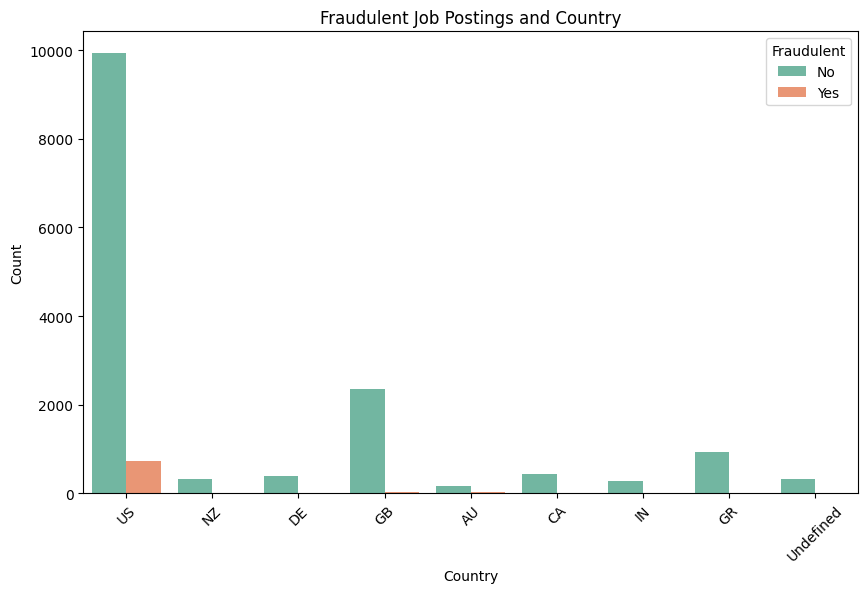

In [16]:
loc_data = pd.DataFrame(country_state_city, columns=['Country', 'State', 'City'])
data['Country'] = loc_data['Country']
data['State'] = loc_data['State']
data['City'] = loc_data['City']
mean = data['Country'].value_counts().mean()
country_counts = data['Country'].value_counts()
countries_above_mean = country_counts[country_counts >= mean].index.tolist()
countries_above_mean_data = data[data['Country'].isin(countries_above_mean)]
countries_above_mean_data['Country'].apply(lambda x:x if x in countries_above_mean else 'Other Countries')

plt.figure(figsize=(10, 6))
sns.countplot(x='Country', hue='fraudulent', data=countries_above_mean_data, palette='Set2')
plt.title('Fraudulent Job Postings and Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Fraudulent', loc='upper right', labels=['No', 'Yes'])
plt.show()

Majority of fraudulent jobs in this dataset are posted in the US.

### Within US


C:\Users\jethr\AppData\Local\Temp\ipykernel_28280\1963749501.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  US_data['State_City'] = US_data['State'] + ',' + US_data['City']


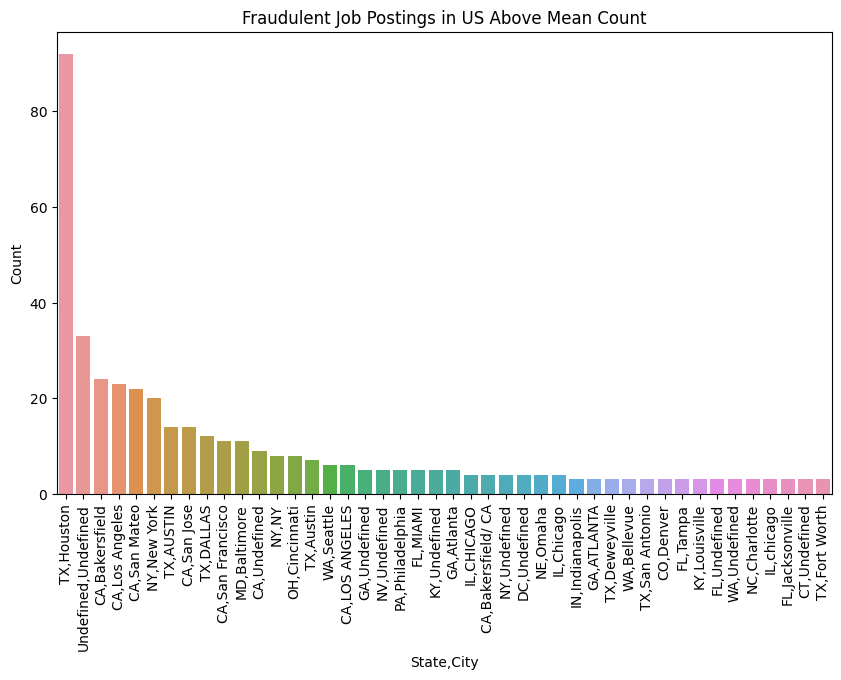

In [17]:
US_data = data[(data['Country'] == 'US') & (data['fraudulent'] == 1)]
US_data['State_City'] = US_data['State'] + ',' + US_data['City']

mean_count = US_data['State_City'].value_counts().mean()

above_mean_cities = US_data['State_City'].value_counts()[US_data['State_City'].value_counts() > mean_count]
plt.figure(figsize=(10, 6))
sns.barplot(x=above_mean_cities.index, y=above_mean_cities.values)
plt.xlabel('State,City')
plt.ylabel('Count')
plt.title('Fraudulent Job Postings in US Above Mean Count')
plt.xticks(rotation=90)
plt.show()

Majority of US Fraudulent job postings are listed in Houston, Texas.

## Description

C:\Users\jethr\AppData\Local\Temp\ipykernel_28280\3454848418.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['desc_fake_word_count'], shade=True, color="red", label="Fake Job", ax=ax)
C:\Users\jethr\AppData\Local\Temp\ipykernel_28280\3454848418.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['desc_real_word_count'], shade=True, color="green", label="Real Job", ax=ax)


Text(0.5, 0.98, 'Words in Job Description')

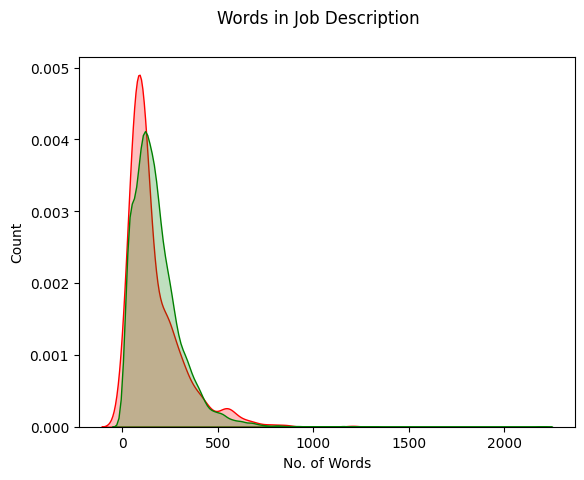

In [18]:
data['description'].isna().sum()
data['description'].fillna('',inplace=True)

data['desc_fake_word_count']=data[data["fraudulent"]==1]['description'].apply(lambda x: len(x.split()))
data['desc_real_word_count']=data[data["fraudulent"]==0]['description'].apply(lambda x: len(x.split()))



fig, ax = plt.subplots()

sns.kdeplot(data['desc_fake_word_count'], shade=True, color="red", label="Fake Job", ax=ax)
sns.kdeplot(data['desc_real_word_count'], shade=True, color="green", label="Real Job", ax=ax)

ax.set_xlabel("No. of Words")
ax.set_ylabel("Count")

fig.suptitle("Words in Job Description")

Similar distributions of number of words in job description between fake and real postings. 

### Generate Word Clouds

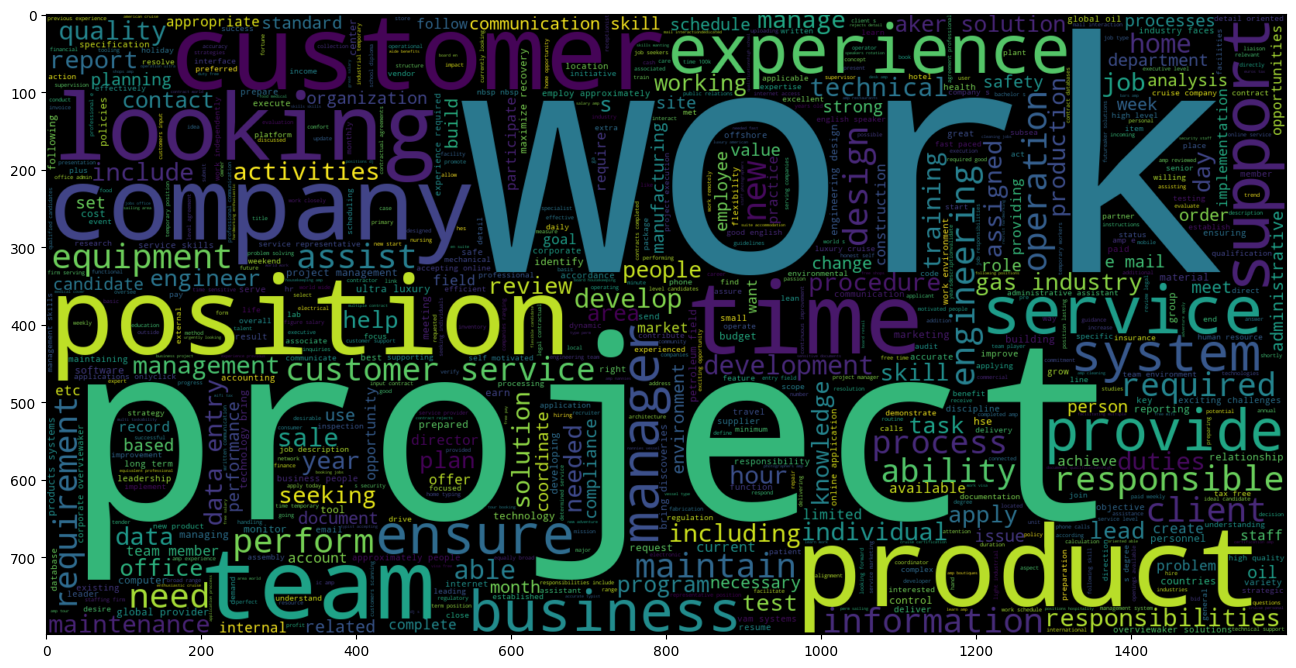

In [19]:
fake_desc = data[data.fraudulent==1].description
real_desc = data[data.fraudulent==0].description

STOPWORDS = spacy.lang.en.stop_words.STOP_WORDS
plt.figure(figsize = (16,14))
wc = WordCloud(min_font_size = 3,  max_words = 3000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(str(" ".join(fake_desc)))
plt.imshow(wc,interpolation = 'bilinear')

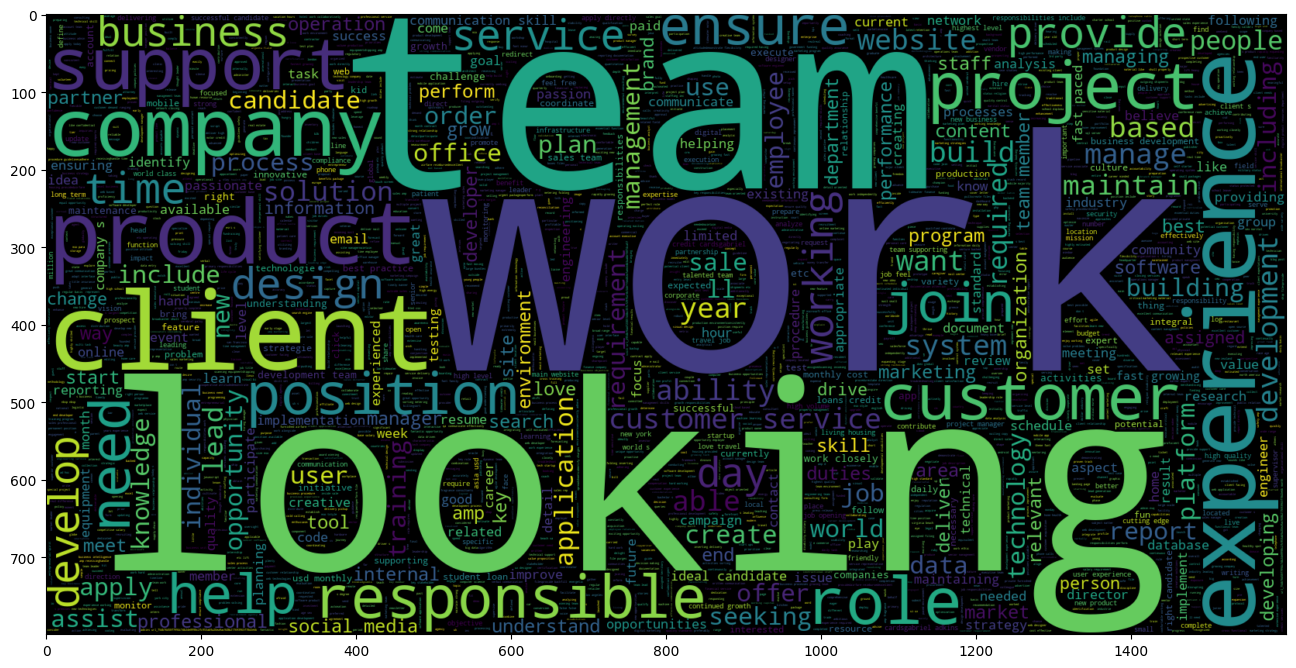

In [20]:
plt.figure(figsize = (16,14))
wc = WordCloud(min_font_size = 3,  max_words = 3000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(str(" ".join(real_desc)))
plt.imshow(wc,interpolation = 'bilinear')

### Generate N-grams

In [23]:
import string
nltk.download('punkt')
def clean_tokens(tokens):
    tokens = [token for token in tokens if token not in string.punctuation]
    tokens = [token for token in tokens if token.lower() not in STOPWORDS]
    return tokens

fake_desc_tokens = fake_desc.apply(word_tokenize).apply(clean_tokens)
fake_desc_tokens['trigrams'] = fake_desc_tokens.apply(lambda x: list(ngrams(x, 3)))

#get top 10 fake trigrams
fake_3grams = [ngram for ngrams_list in fake_desc_tokens['trigrams'] for ngram in ngrams_list]
fake_3grams_counts = Counter(fake_3grams)
top_10_fake_3grams = fake_3grams_counts.most_common(10)
for trigram, count in top_10_fake_3grams:
    print(f"{trigram}: {count}")



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jethr\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


('oil', 'gas', 'industry'): 117
('6', 'ultra', 'luxury'): 63
('gas', 'industry', 'engineering'): 56
('28', '000', 'people'): 56
('solutions', 'global', 'provider'): 54
('global', 'provider', 'products'): 54
('provider', 'products', 'systems'): 54
('products', 'systems', 'services'): 54
('systems', 'services', 'oil'): 54
('services', 'oil', 'gas'): 54


In [24]:
real_desc_tokens = real_desc.apply(word_tokenize).apply(clean_tokens)
real_desc_tokens['trigrams'] = real_desc_tokens.apply(lambda x: list(ngrams(x, 3)))

#get top 10 real trigrams
real_3grams = [ngram for ngrams_list in real_desc_tokens['trigrams'] for ngram in ngrams_list]
real_3grams_counts = Counter(real_3grams)
top_10_real_3grams = real_3grams_counts.most_common(10)
for trigram, count in top_10_real_3grams:
    print(f"{trigram}: {count}")

('student', 'loans', 'credit'): 726
('monthly', '200', 'cost'): 720
('200', 'cost', 'living'): 720
('play', 'kids', 'paid'): 715
('usd', 'monthly', '200'): 687
('cost', 'living', 'housing'): 677
('reimbursedexcellent', 'student', 'loans'): 626
('kids', 'paid', 'love'): 623
('paid', 'love', 'travel'): 623
('loans', 'credit', 'cardsgabriel'): 615


### Generate Sentence length column

In [10]:
train['description'].fillna('',inplace=True)
test['description'].fillna('',inplace=True)
train['sentence_length'] = train['description'].apply(lambda x: len(x.split()))
test['sentence_length'] = test['description'].apply(lambda x: len(x.split()))

train.sentence_length.describe()


count    12516.000000
mean       177.202621
std        127.581405
min          0.000000
25%         90.000000
50%        150.000000
75%        233.000000
max       1234.000000
Name: sentence_length, dtype: float64

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

train['sentence_length'] = train['sentence_length'].values.reshape(-1, 1)
test['sentence_length'] = test['sentence_length'].values.reshape(-1, 1)
scaler.fit(train[['sentence_length']])
train['sentence_length_scaled'] = scaler.transform(train[['sentence_length']])
test['sentence_length_scaled'] = scaler.transform(test[['sentence_length']])

train.sentence_length_scaled.describe()

count    1.251600e+04
mean     3.746870e-17
std      1.000040e+00
min     -1.388993e+00
25%     -6.835330e-01
50%     -2.132263e-01
75%      4.373647e-01
max      8.283649e+00
Name: sentence_length_scaled, dtype: float64

## Has Questions

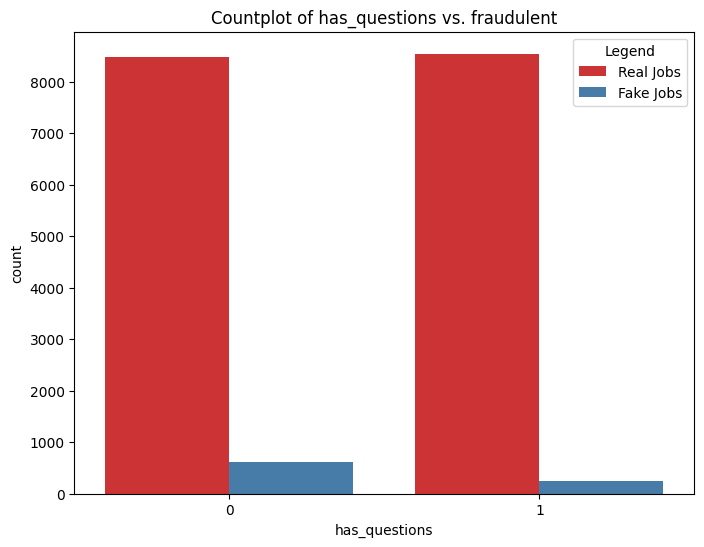

In [25]:
plt.figure(figsize=(8, 6))

# Create the countplot
ax = sns.countplot(x="has_questions", hue="fraudulent", data=data, palette="Set1")

plt.title("Countplot of has_questions vs. fraudulent")
ax.legend(title="Legend", labels=["Real Jobs", "Fake Jobs"])
plt.show()

No significant difference observed between distributions of Real/Fake classes for both jobs without questions and with questions. 

## Employment Type

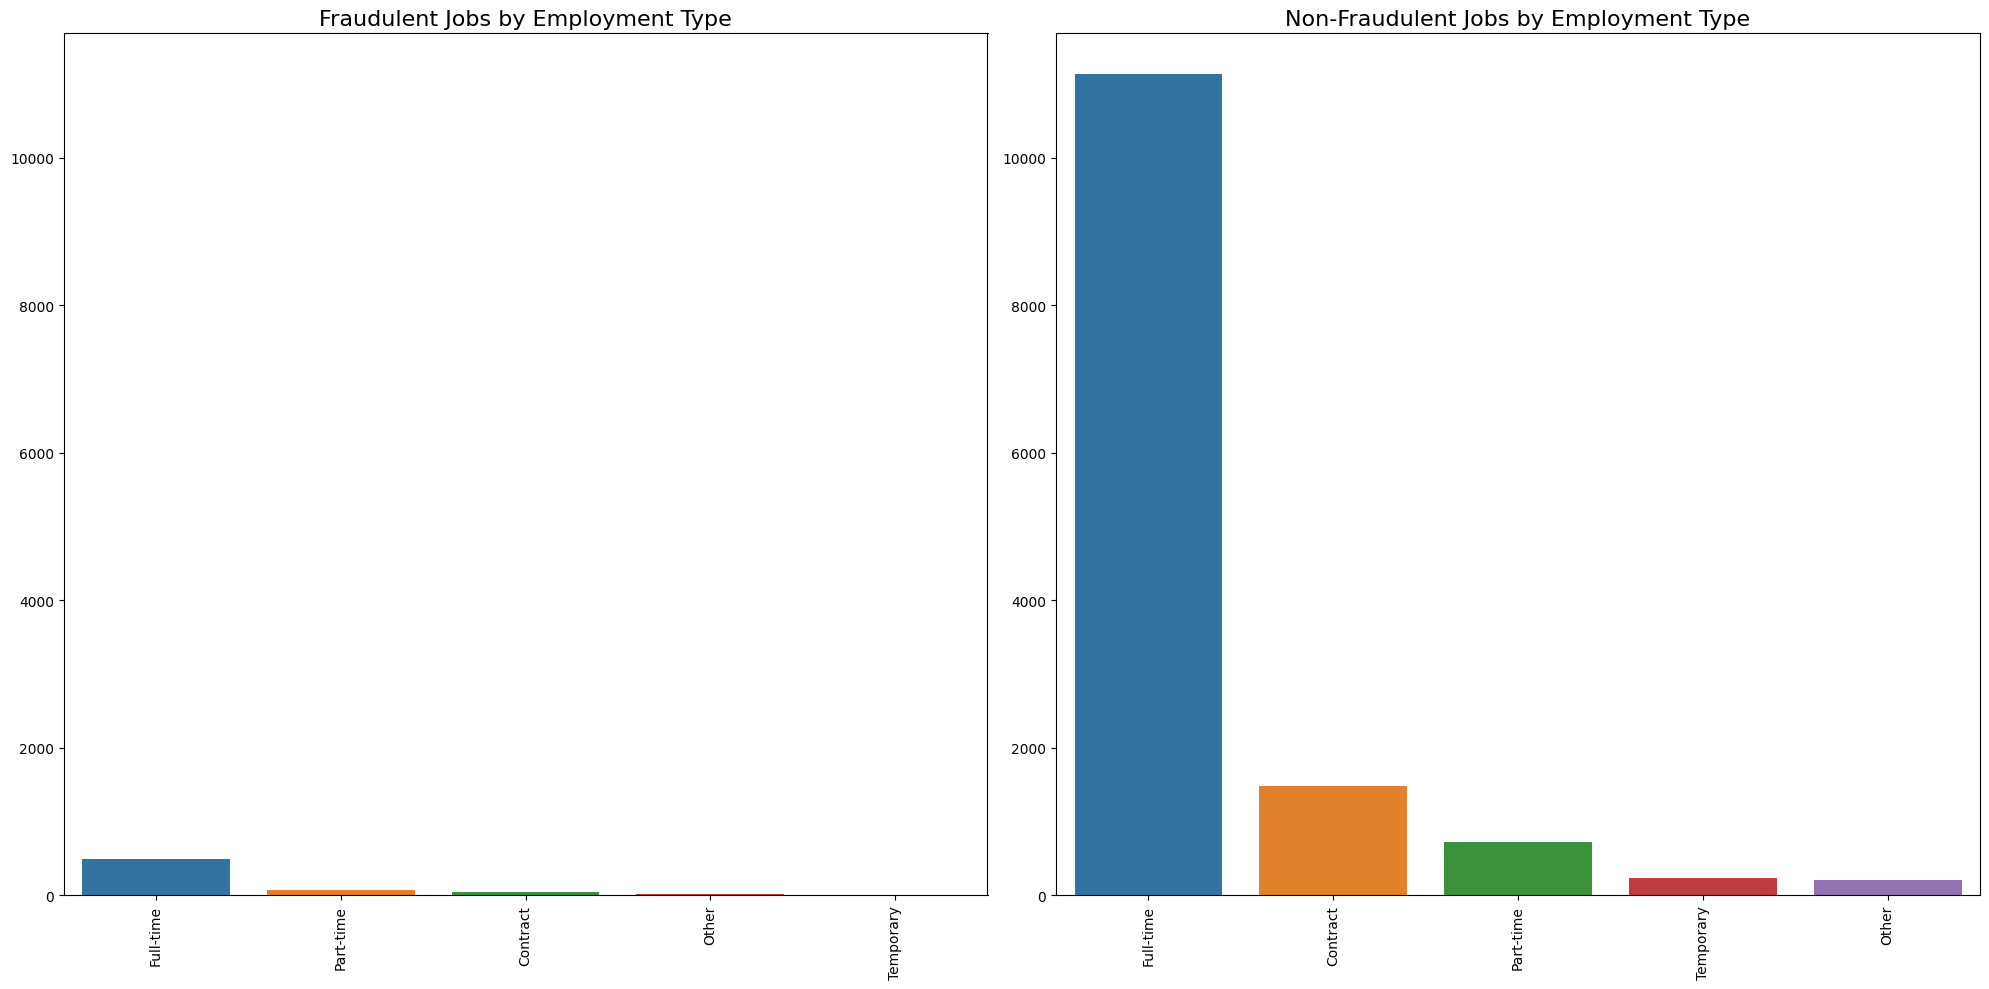

In [26]:
fraud = dict(data[data.fraudulent==1].employment_type.value_counts())
non_fraud = dict(data[data.fraudulent==0].employment_type.value_counts())


plt.figure(figsize=(20, 10))

ax1 = plt.subplot(121)
ax2 = plt.subplot(122, sharey=ax1)

sns.barplot(x=list(fraud.keys()), y=list(fraud.values()), ax=ax1)
ax1.set_title('Fraudulent Jobs by Employment Type', fontsize=16)
sns.barplot(x=list(non_fraud.keys()), y=list(non_fraud.values()), ax=ax2)
ax2.set_title('Non-Fraudulent Jobs by Employment Type', fontsize=16)



ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)


plt.tight_layout()
plt.show()

Distribution of Fraudulent jobs is in line with the distribution of non-fraudulent jobs by employment type.

In [27]:
from sklearn.model_selection import train_test_split
X = data[['description','Country', 'State', 'City']]
Y = data["fraudulent"]
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.1)


X_train_description = X_train["description"]
X_test_description = X_test["description"]

X_train_country = X_train["Country"]
X_test_country = X_test["Country"]

X_train_state = X_train["State"]
X_test_state = X_test["State"]

X_train_city = X_train["City"]
X_test_city = X_test["City"]

features = {'description':(X_train_description, X_test_description),
            'Country':(X_train_country, X_test_country),
            'State':(X_train_state, X_test_state),
             'City':(X_train_city, X_test_city)}

In [37]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix

def tokenize_test(X_train, y_train, X_test, y_test, vect):
    X_train = X_train.str.replace('[^a-zA-Z0-9 ]', '')
    X_test = X_test.str.replace('[^a-zA-Z0-9 ]', '')

    # create document-term matrices using countVectorizer
    X_train_dtm = vect.fit_transform(X_train)
    X_test_dtm = vect.transform(X_test)
    
    print('Features: ', X_train_dtm.shape[1])
    
    nb = MultinomialNB()

    
    nb.fit(X_train_dtm, y_train)
    y_pred_class = nb.predict(X_test_dtm)
    
    
    print('Training Accuracy: ', metrics.accuracy_score(y_train, nb.predict(X_train_dtm)))
    print("--------Test Results-------------")
    print('Accuracy Score:', metrics.accuracy_score(y_test, y_pred_class))
    print('Precision Score:', (metrics.precision_score(y_test, y_pred_class)))
    print('Recall Score:', (metrics.recall_score(y_test, y_pred_class)))
    print('F1 Score:', (metrics.f1_score(y_test, y_pred_class)))
    logloss = metrics.log_loss(y_test,nb.predict_proba(X_test_dtm))
    print(f'Log Loss: {logloss}')
    print(y_test.value_counts())
    y_score_mnb = nb.predict_proba(X_test_dtm)
    print('ROC Score:', (metrics.roc_auc_score(y_test, y_score_mnb[:,1])))
    conf_matrix = confusion_matrix(y_test,y_pred_class)
    TP = conf_matrix[1, 1]
    TN = conf_matrix[0, 0]
    FP = conf_matrix[0, 1]
    FN = conf_matrix[1, 0]

    print(f"True Positives: {TP}")
    print(f"True Negatives: {TN}")
    print(f"False Positives: {FP}")
    print(f"False Negatives: {FN}")

In [38]:


for key, values in features.items():
  print("column : ", key.upper())
  tokenize_test(values[0], y_train, values[1], y_test, CountVectorizer(lowercase=False, ngram_range=(1, 4), stop_words='english', max_df=0.5))
  print("\n")

column :  DESCRIPTION
Features:  2518665
Training Accuracy:  0.9959607258264976
--------Test Results-------------
Accuracy Score: 0.9753914988814317
Precision Score: 0.9852941176470589
Recall Score: 0.6090909090909091
F1 Score: 0.752808988764045
Log Loss: 0.7757730451316232
fraudulent
0    1678
1     110
Name: count, dtype: int64
ROC Score: 0.9099387799328205
True Positives: 67
True Negatives: 1677
False Positives: 1
False Negatives: 43


C:\Users\jethr\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(




column :  COUNTRY
Features:  90
Training Accuracy:  0.9532687049465572
--------Test Results-------------
Accuracy Score: 0.9384787472035794
Precision Score: 0.5
Recall Score: 0.01818181818181818
F1 Score: 0.03508771929824561
Log Loss: 0.22401667914622475
fraudulent
0    1678
1     110
Name: count, dtype: int64
ROC Score: 0.6557834001516958
True Positives: 2
True Negatives: 1676
False Positives: 2
False Negatives: 108


column :  STATE
Features:  296
Training Accuracy:  0.9533308476261496
--------Test Results-------------
Accuracy Score: 0.9384787472035794
Precision Score: 0.0
Recall Score: 0.0
F1 Score: 0.0
Log Loss: 0.22428142564919953
fraudulent
0    1678
1     110
Name: count, dtype: int64
ROC Score: 0.6659280528768013
True Positives: 0
True Negatives: 1678
False Positives: 0
False Negatives: 110


column :  CITY
Features:  3214
Training Accuracy:  0.9512179965200099
--------Test Results-------------
Accuracy Score: 0.9435123042505593
Precision Score: 0.6956521739130435
Recall Sco

C:\Users\jethr\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jethr\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


# Word Embeddings with Roberta

In [12]:

import torch
from transformers import RobertaModel, RobertaTokenizer

model_name = 'roberta-base'
tokenizer = RobertaTokenizer.from_pretrained(model_name)
model = RobertaModel.from_pretrained(model_name)


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [15]:
roberta_embeddings = []
from tqdm import tqdm
def get_roberta_embeddings(text):
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True)
    with torch.no_grad():
        outputs = model(**inputs)
    return outputs.last_hidden_state.mean(dim=1).squeeze().numpy()

for input_text in tqdm(data['description'].dropna.tolist(), desc='Embedding texts'):
    roberta_embeddings.append(get_roberta_embeddings(input_text))

roberta_embeddings_df = pd.DataFrame(roberta_embeddings)
roberta_embeddings_df.to_csv('roberta_embeddings.csv', index=False)


Embedding texts:  17%|█▋        | 3037/17870 [21:39<1:45:46,  2.34it/s]


KeyboardInterrupt: 

In [37]:
cols = ["benefits","company_profile","requirements","description"]
for column in cols:
    embeddings = pd.read_csv(f"../Data/train_{column}_distilbert_embeddings.csv")
    embeddings['fraudulent'] = train['fraudulent']
    embeddings['none'] = 1 - train['fraudulent']
    columns = ['fraudulent', 'none']
    features = list(range(767))
    rows = [{c:embeddings[str(f)].corr(embeddings[c]) for c in columns} for f in features]
    train_correlations = pd.DataFrame(rows, index=features)
    count_greater_than_02 = (abs(train_correlations['fraudulent']) > 0.2).sum()
    print(f"{column}: {count_greater_than_02}")

benefits: 0
company_profile: 324
requirements: 0
description: 0


In [36]:
cols = ["benefits","company_profile","requirements","description"]
for column in cols:
    embeddings = pd.read_csv(f"../Data/test_{column}_distilbert_embeddings.csv")
    embeddings['fraudulent'] = test['fraudulent']
    embeddings['none'] = 1 - test['fraudulent']
    columns = ['fraudulent', 'none']
    features = list(range(767))
    rows = [{c:embeddings[str(f)].corr(embeddings[c]) for c in columns} for f in features]
    test_correlations = pd.DataFrame(rows, index=features)
    count_greater_than_02 = (abs(test_correlations['fraudulent']) > 0.1).sum()
    print(f"{column}: {count_greater_than_02}")

benefits: 0
company_profile: 566
requirements: 9
description: 42
